In [15]:
from simply_nwb.pipeline import NWBSession
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#this is how i pulled all crystal sessions, can replace with your own way to get a list of NWBSession objects
SESSIONS_TO_PROCESS = list()
dirprefix = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
for datename in os.listdir(dirprefix):
    datedir = os.path.join(dirprefix, datename)
    SESSIONS_TO_PROCESS.append(datedir)

crystalSessions = list()
for session in SESSIONS_TO_PROCESS:
    sessionToAppend = NWBSession(session)
    crystalSessions.append(sessionToAppend)
    
print(crystalSessions)


[<simply_nwb.pipeline.NWBSession object at 0x0000018B682CF260>, <simply_nwb.pipeline.NWBSession object at 0x0000018B683795B0>, <simply_nwb.pipeline.NWBSession object at 0x0000018B463FD520>, <simply_nwb.pipeline.NWBSession object at 0x0000018B477560F0>, <simply_nwb.pipeline.NWBSession object at 0x0000018B47803FE0>, <simply_nwb.pipeline.NWBSession object at 0x0000018B489D3C50>, <simply_nwb.pipeline.NWBSession object at 0x0000018B48A3F2C0>, <simply_nwb.pipeline.NWBSession object at 0x0000018B49C17B00>, <simply_nwb.pipeline.NWBSession object at 0x0000018B48AF75F0>, <simply_nwb.pipeline.NWBSession object at 0x0000018B49CC7E60>, <simply_nwb.pipeline.NWBSession object at 0x0000018B4AE9F980>, <simply_nwb.pipeline.NWBSession object at 0x0000018B4BFD7E00>, <simply_nwb.pipeline.NWBSession object at 0x0000018B48A22510>, <simply_nwb.pipeline.NWBSession object at 0x0000018B48AF6150>, <simply_nwb.pipeline.NWBSession object at 0x0000018B4D146E40>, <simply_nwb.pipeline.NWBSession object at 0x0000018B4E

In [3]:
#creates lists of sessions according to dosage
cnoSessions05 = list()
cnoSessions2 = list()
salineSessions = list()
for session in crystalSessions:
    sessionID = session.nwb.session_description
    if sessionID == "Dosage 0.5mg/kg":
        cnoSessions05.append(session)
    elif sessionID == "Dosage 2mg/kg":
        cnoSessions2.append(session)
    elif sessionID == "Dosage 0mg/kg":
        salineSessions.append(session)
    else:
        print("fuck")
print(len(cnoSessions05))
print(len(cnoSessions2))
print(len(salineSessions))
print(len(crystalSessions))



40
46
41
127


Text(0, 0.5, 'Number of Total Saccades')

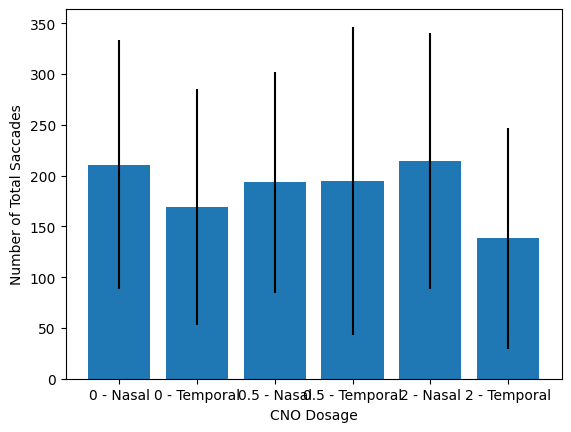

In [32]:
#calculates average number of saccades in each direction in each condition & graphs it
nasal05 = list()
nasal2 = list()
nasal0 = list()
temporal05 = list()
temporal2 = list()
temporal0 = list()
for sess in cnoSessions05:
    #pred_dirs = sess.pull("PredictSaccades.saccades_predicted_labels")
    #temporal = len(np.where(pred_dirs == -1)[0])
    #nasal = len(np.where(pred_dirs == 1)[0])
    temporal = len(sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms"))
    nasal = len(sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms"))
    
    # v This is to graph each waveform v
    # temporal =sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms") 
    # nasal = sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms")
    temporal05.append(temporal)
    nasal05.append(nasal)
    
for sess in cnoSessions2:
    # pred_dirs = sess.pull("PredictSaccades.saccades_predicted_labels")
    # temporal = len(np.where(pred_dirs == -1)[0])
    # nasal = len(np.where(pred_dirs == 1)[0])
    temporal = len(sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms"))
    nasal = len(sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms"))
    
    # v This is to graph each waveform v
    # temporal = sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms")
    # nasal =  sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms")
    temporal2.append(temporal)
    nasal2.append(nasal)
for sess in salineSessions:
    # pred_dirs = sess.pull("PredictSaccades.saccades_predicted_labels")
    # temporal = len(np.where(pred_dirs == -1)[0])
    # nasal = len(np.where(pred_dirs == 1)[0])
    temporal = len(sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms"))
    nasal = len(sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms"))

    # v This is to graph each waveform v
    # temporal = sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms")
    # nasal =  sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms")
    temporal0.append(temporal)
    nasal0.append(nasal)
#print(nasal05)
#print(temporal05)
nasal05Avg = np.mean(nasal05)
nasal2Avg = np.mean(nasal2)
nasal0Avg = np.mean(nasal0)
nasal05Std = np.std(nasal05)
nasal2Std = np.std(nasal2)
nasal0Std = np.std(nasal0)
temporal05Avg = np.mean(temporal05)
temporal2Avg = np.mean(temporal2)
temporal0Avg = np.mean(temporal0)
temporal05Std = np.std(temporal05)
temporal2Std = np.std(temporal2)
temporal0Std = np.std(temporal0)
means = [nasal0Avg, temporal0Avg, nasal05Avg, temporal05Avg, nasal2Avg, temporal2Avg]
condition = ['0 - Nasal', '0 - Temporal', '0.5 - Nasal', '0.5 - Temporal', '2 - Nasal', '2 - Temporal']
std = [nasal0Std, temporal0Std, nasal05Std, temporal05Std, nasal2Std, temporal2Std]
plt.bar(condition, means, yerr=std)
plt.xlabel('CNO Dosage')
plt.ylabel('Number of Total Saccades')

# means = [nasal0Avg, nasal05Avg, nasal2Avg]
# condition = ['0 - Nasal', '0.5 - Nasal', '2 - Nasal']
# std = [nasal0Std, nasal05Std, nasal2Std]
# plt.bar(condition, means, yerr=std)
# plt.xlabel('CNO Dosage')
# plt.ylabel('Number of Total Nasal Saccades')

# means = [temporal0Avg, temporal05Avg, temporal2Avg]
# condition = ['0 - Temporal', '0.5 - Temporal', '2 - Temporal']
# std = [temporal0Std, temporal05Std, temporal2Std]
# plt.bar(condition, means, yerr=std)
# plt.xlabel('CNO Dosage')
# plt.ylabel('Number of Total Temporal Saccades')

In [17]:
#creates list of total number of saccades per condition, can then calculate averages & graph if you want
sac05 = list()
sac2 = list()
sac0 = list()
for sess in cnoSessions05:
    totalSaccades = len(sess.pull("PredictSaccades.saccades_predicted_labels"))
    sac05.append(totalSaccades)
for sess in cnoSessions2:
    totalSaccades = len(sess.pull("PredictSaccades.saccades_predicted_labels"))
    sac2.append(totalSaccades)
for sess in salineSessions:
    totalSaccades = len(sess.pull("PredictSaccades.saccades_predicted_labels"))
    sac0.append(totalSaccades)


ValueError: Unable to find key 'saccades_predicted_labels' in Enrichment 'PredictSaccades' Available keys '['saccades_fps', 'saccades_predicted_nasal_epochs', 'saccades_predicted_nasal_waveforms', 'saccades_predicted_noise_waveforms', 'saccades_predicted_peak_indices', 'saccades_predicted_temporal_epochs', 'saccades_predicted_temporal_waveforms']'

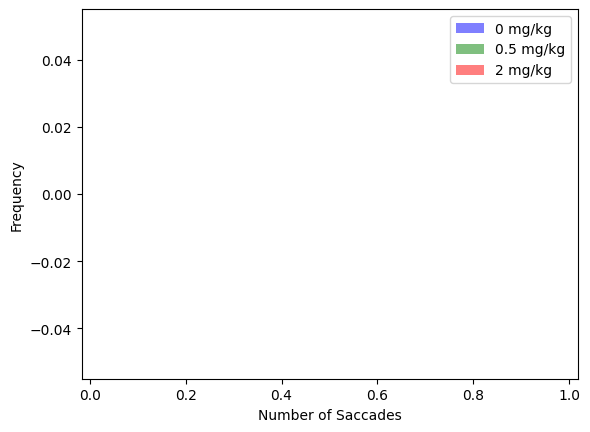

In [18]:
#creates histogram of frequency of total saccades per session in each condition
plt.hist(sac0, color='b', alpha=0.5, bins=10, density=False, histtype='bar', label='0 mg/kg', rwidth=0.4)
plt.hist(sac05, color='g', alpha=0.5, bins=10, density=False, histtype='bar', label='0.5 mg/kg', rwidth=0.4)
plt.hist(sac2, color='r', alpha=0.5, bins=10, density=False, histtype='bar', label='2 mg/kg', rwidth=0.4)
plt.xlabel('Number of Saccades')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [65]:
#anna bullshit, ignore lol
sessionsNR1KO1 = list()
sessions = ["/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-5-8-2024-NR1KO1.nwb",
           #"/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-5-8-2024-NR1KO2.nwb",
            "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-6-8-2024-NR1KO1.nwb",
           # "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-6-8-2024-NR1KO2.nwb",
            "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-23-7-2024-NR1KO1.nwb",
            #"/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-24-7-2024-NR1KO2.nwb",
           # "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-30-7-2024-NR1KO2.nwb",
]
for session in sessions:
    sessionToAppend = NWBSession(session)
    sessionsNR1KO1.append(sessionToAppend)

sessionsNR1KO2 = list()
sessions2 = [#"/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-5-8-2024-NR1KO1.nwb",
           "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-5-8-2024-NR1KO2.nwb",
            #"/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-6-8-2024-NR1KO1.nwb",
           "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-6-8-2024-NR1KO2.nwb",
           # "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-23-7-2024-NR1KO1.nwb",
            "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-24-7-2024-NR1KO2.nwb",
            "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-30-7-2024-NR1KO2.nwb",
]
for session in sessions2:
    sessionToAppend = NWBSession(session)
    sessionsNR1KO2.append(sessionToAppend)

controlSessions = list()
sessionsC = [ "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-4-9-2024-control.nwb",
            "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-4-9-2024-control1.nwb",
            "/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-6-9-2024-control1.nwb"
           ]
for session in sessionsC:
    sessionToAppend = NWBSession(session)
    controlSessions.append(sessionToAppend)

In [92]:
# List available enrichments in this dataset
#crystal ignore
sess = NWBSession('/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-5-8-2024-NR1KO1.nwb')
sess2 = NWBSession('/home/retina2/Documents/GitHub/conversion-scripts/nwb-conversion-scripts/anna_b/predicted/predictive-putative-nwb-5-8-2024-NR1KO2.nwb')
sess.available_enrichments()

['PutativeSaccades', 'PredictSaccades']

In [130]:
#crystal ignore, testing to see what each thing pulls
sess.available_keys("PredictSaccades")
#print(sess.pull("PutativeSaccades.pose_corrected"))
#print(sess.pull("PredictSaccades.saccades_predicted_nasal_epochs").shape)
#print(sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms").shape)
for sess in sessionsNR1KO2:
    print(sess.pull("PredictSaccades.saccades_predicted_nasal_epochs").shape)
    print(sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms").shape)
    print(sess.pull("PredictSaccades.saccades_predicted_labels").shape)
    print(sess.pull("PredictSaccades.saccades_predicted_waveforms").shape)

(25, 2)
(25, 80)
(1045,)
(1045, 80, 2)
(25, 2)
(25, 80)
(1588,)
(1588, 80, 2)
(25, 2)
(25, 80)
(1606,)
(1606, 80, 2)
(25, 2)
(25, 80)
(1033,)
(1033, 80, 2)


In [1]:
#can graph raw eye traces with this

sess = cnoSessions05[2]
# sess2 = sessionsNR1KO1[2]
filtered = sess.pull("PutativeSaccades.pose_reoriented")
# filtered2 = sess2.pull("PutativeSaccades.pose_reoriented")
x = (filtered[0:40000][:, 0])
# x2 = (filtered2[0:40000][:, 0])
plt.plot(x, color='b')
# plt.plot(x2, color='r')

NameError: name 'cnoSessions05' is not defined

In [24]:
print(sess.pull("PredictSaccades.saccades_predicted_labels"))

[ 0.  1. -1. -1.  0.  1.  0. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.
  1.  0.  0.  0.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1. -1.  0.  1. -1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  0.  1.  1.
  1.  0.  0.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1.  1.  1.  0. -1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1. -1.
  0.  0.  0. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.
  1.  0.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1

In [71]:
# Grab the saccade waveforms
#crystal ignore
all_waveforms = sess.pull("PredictSaccades.saccades_predicted_waveforms")

In [72]:
# Shape is (saccade num, time, x&y)
#crystal ignore
all_waveforms.shape

(763, 80, 2)

In [124]:
# So to get all x saccades we can do
#crystal ignore
xwaves = all_waveforms[:, :, 0]
print(sess.pull("PredictSaccades.saccades_predicted_nasal_epochs").shape)
print(xwaves[pred_dirs == 1].shape)

(25, 2)
(523, 80)


In [74]:
# Let's grab the predicted directions for these saccades
#crystal ignore
pred_dirs = sess.pull("PredictSaccades.saccades_predicted_labels")
pred_dirs

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  0.,  1., -1.,
        0., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [131]:
# Filter out nasal and temporal (1 is nasal)
#crystal ignore
nasal_xsaccades = xwaves[pred_dirs == 1]
temporal_xsaccades = xwaves[pred_dirs == -1]
#nasal_xsaccades = sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms")
print(f"We have {nasal_xsaccades.shape[0]} nasal saccades")
print(f"We have {temporal_xsaccades.shape[0]} temporal saccades")

We have 523 nasal saccades
We have 124 temporal saccades


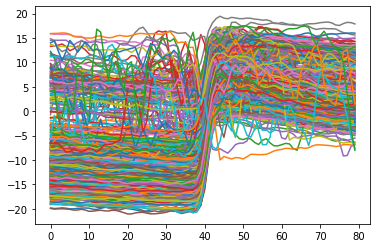

In [132]:
# Lets graph the nasal saccades
#crystal ignore

fig, ax = plt.subplots()
for saccade in nasal_xsaccades:
    ax.plot(saccade)


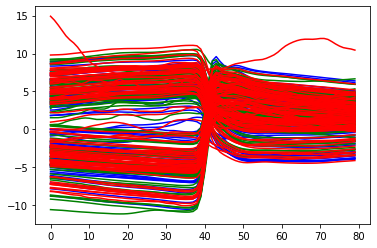

In [185]:
#average waveform for each individual session
import numpy as np
for session in salineSessions:
    pred_dirs = session.pull("PredictSaccades.saccades_predicted_labels")
    all_waveforms = session.pull("PredictSaccades.saccades_predicted_waveforms")
    xwaves = all_waveforms[:, :, 0]
    nasal_xsaccades = xwaves[pred_dirs == 1]
    temporal_xsaccades = xwaves[pred_dirs == -1]
    nasalAvg = np.mean(nasal_xsaccades, axis=0)
    temporalAvg = np.mean(temporal_xsaccades, axis=0)
    plt.plot(nasalAvg, color='b')
    plt.plot(temporalAvg, color='b')
for session in cnoSessions05:
    pred_dirs = session.pull("PredictSaccades.saccades_predicted_labels")
    all_waveforms = session.pull("PredictSaccades.saccades_predicted_waveforms")
    xwaves = all_waveforms[:, :, 0]
    nasal_xsaccades = xwaves[pred_dirs == 1]
    temporal_xsaccades = xwaves[pred_dirs == -1]
    nasalAvg = np.mean(nasal_xsaccades, axis=0)
    temporalAvg = np.mean(temporal_xsaccades, axis=0)
    plt.plot(nasalAvg, color='g')
    plt.plot(temporalAvg, color='g')
for session in cnoSessions2:
    pred_dirs = session.pull("PredictSaccades.saccades_predicted_labels")
    all_waveforms = session.pull("PredictSaccades.saccades_predicted_waveforms")
    xwaves = all_waveforms[:, :, 0]
    nasal_xsaccades = xwaves[pred_dirs == 1]
    temporal_xsaccades = xwaves[pred_dirs == -1]
    nasalAvg = np.mean(nasal_xsaccades, axis=0)
    temporalAvg = np.mean(temporal_xsaccades, axis=0)
    plt.plot(nasalAvg, color='r')
    plt.plot(temporalAvg, color='r')

In [1]:
#average waveform per session type
ssN = list()
c05N = list()
c2N = list()
ssT = list()
c05T = list()
c2T = list()
for session in salineSessions:
    pred_dirs = session.pull("PredictSaccades.saccades_predicted_labels")
    all_waveforms = session.pull("PredictSaccades.saccades_predicted_waveforms")
    xwaves = all_waveforms[:, :, 0]
    nasal_xsaccades = xwaves[pred_dirs == 1]
    temporal_xsaccades = xwaves[pred_dirs == -1]
    nasalAvg = np.mean(nasal_xsaccades, axis=0)
    temporalAvg = np.mean(temporal_xsaccades, axis=0)
    ssN.append(nasalAvg)
    ssT.append(temporalAvg)
for session in cnoSessions05:
    pred_dirs = session.pull("PredictSaccades.saccades_predicted_labels")
    all_waveforms = session.pull("PredictSaccades.saccades_predicted_waveforms")
    xwaves = all_waveforms[:, :, 0]
    nasal_xsaccades = xwaves[pred_dirs == 1]
    temporal_xsaccades = xwaves[pred_dirs == -1]
    nasalAvg = np.mean(nasal_xsaccades, axis=0)
    temporalAvg = np.mean(temporal_xsaccades, axis=0)
    c05N.append(nasalAvg)
    c05T.append(temporalAvg)
for session in cnoSessions2:
    pred_dirs = session.pull("PredictSaccades.saccades_predicted_labels")
    all_waveforms = session.pull("PredictSaccades.saccades_predicted_waveforms")
    xwaves = all_waveforms[:, :, 0]
    nasal_xsaccades = xwaves[pred_dirs == 1]
    temporal_xsaccades = xwaves[pred_dirs == -1]
    nasalAvg = np.mean(nasal_xsaccades, axis=0)
    temporalAvg = np.mean(temporal_xsaccades, axis=0)
    c2N.append(nasalAvg)
    c2T.append(temporalAvg)
ssNAvg = np.mean(ssN, axis=0)
ssTAvg = np.mean(ssT, axis=0)
c05NAvg = np.mean(c05N, axis=0)
c05TAvg = np.mean(c05T, axis=0)
c2NAvg = np.mean(c2N, axis=0)
c2TAvg = np.mean(c2T, axis=0)
plt.plot(ssNAvg, color='b')
#plt.plot(ssTAvg, color='b')
# plt.plot(c05NAvg, color='g')
# plt.plot(c05TAvg, color='g')
# plt.plot(c2NAvg, color='r')
# plt.plot(c2TAvg, color='r')

NameError: name 'salineSessions' is not defined

Text(0, 0.5, 'Average Number of Saccades')

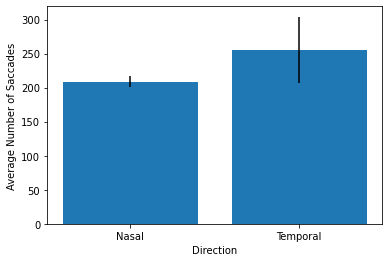

In [58]:
#did not use this for crystal data
nasalTotal = list()
temporalTotal = list()
for session in sessionsToProcess:
    nasal = 0
    temporal = 0
    pred_dirs = session.pull("PredictSaccades.saccades_predicted_labels")
    for dir in pred_dirs:
        if dir == 1:
            nasal = nasal + 1
        elif dir == -1:
            temporal = temporal + 1
    nasalTotal.append(nasal)
    temporalTotal.append(temporal)
nasalAvg = np.mean(nasalTotal)
temporalAvg = np.mean(temporalTotal)
nasalSD = np.std(nasalTotal)
temporalSD = np.std(temporalTotal)
conditions = ['Nasal', 'Temporal']
std = [nasalSD, temporalSD]
means = [nasalAvg, temporalAvg]
plt.bar(conditions, means, yerr = std)
plt.xlabel('Direction')
plt.ylabel('Average Number of Saccades')

